Pada tugas ini, dataset yang digunakan adalah data harga laptop berdasarkan Brand, processor speed, ram_size, storage_capacity, screen_size dan weight.

Dataset ini dapat didownload pada : https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction/data

##Import Library

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

## Loading Dataset

In [59]:
df = pd.read_csv('data/Laptop_price.csv')

In [60]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [61]:
print(df.shape)

(1000, 7)


In [62]:
df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [64]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


##Preprocessing Data

Proses ini untuk melihat sebaran data yang ada dan perubahan apa yang sebaiknya dilakukan agar data semakin bersih dan siap digunakan pada proses pembuatan model.

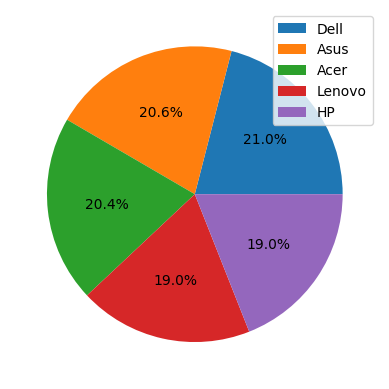

In [65]:
count = df["Brand"].value_counts()
plt.pie(count, autopct="%0.1f%%")
plt.legend(count.index)
plt.show()

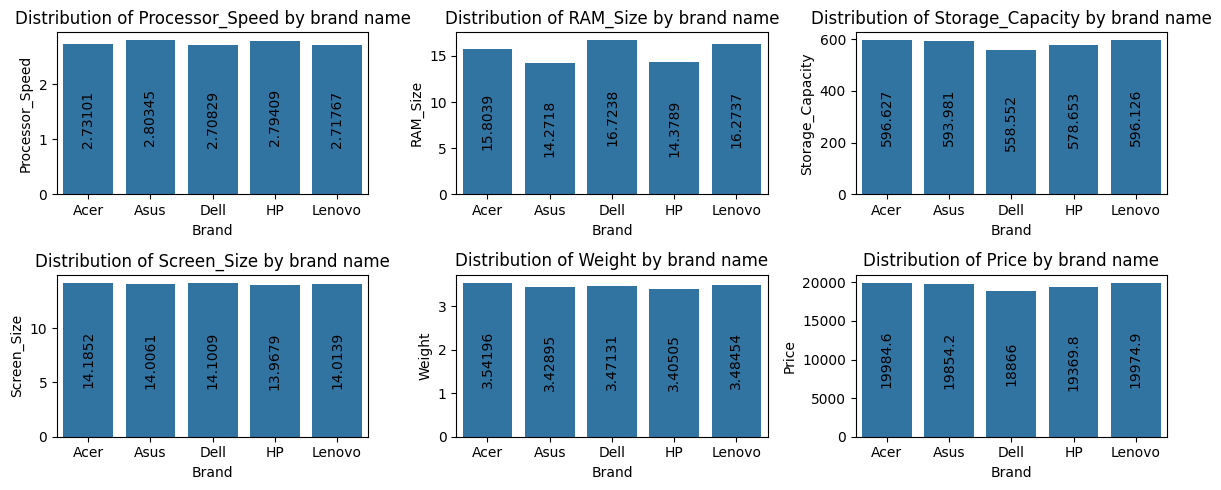

In [66]:
numericals = df.columns[1:]
index = 0
grouped = df.groupby("Brand")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))
for i in range(2):
    for j in range(3):
        plot(grouped, numericals[index], axes[i][j])
        index += 1

plt.tight_layout()
plt.show()


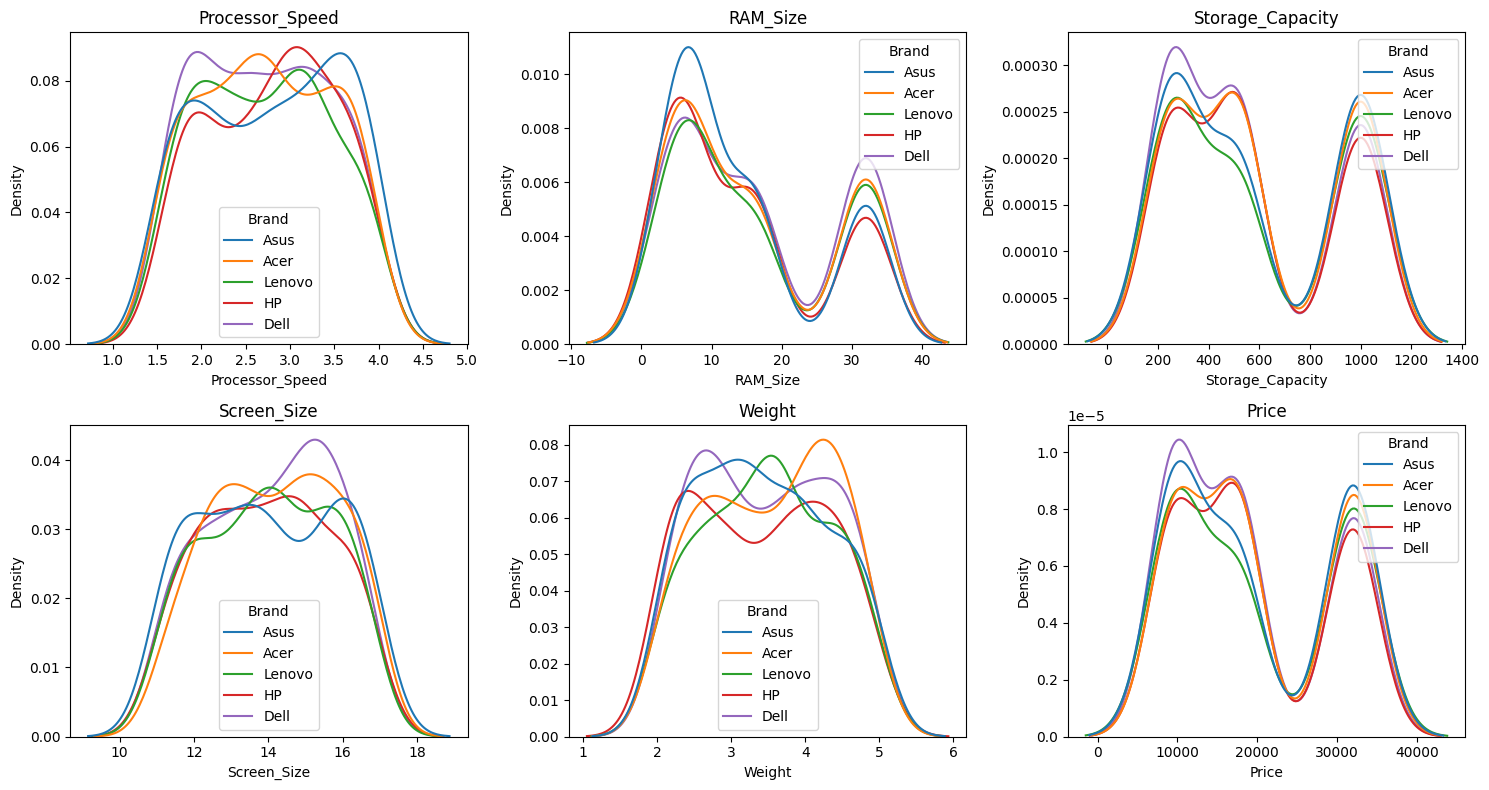

In [67]:
index = 0
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i in range(2):
    for j in range(3):
        sns.kdeplot(df, x=numericals[index], hue="Brand", ax=axes[i][j])
        axes[i][j].set_title(numericals[index])
        index += 1
plt.tight_layout()
plt.show()

<ipython-input-68-394242781ca5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdBu")


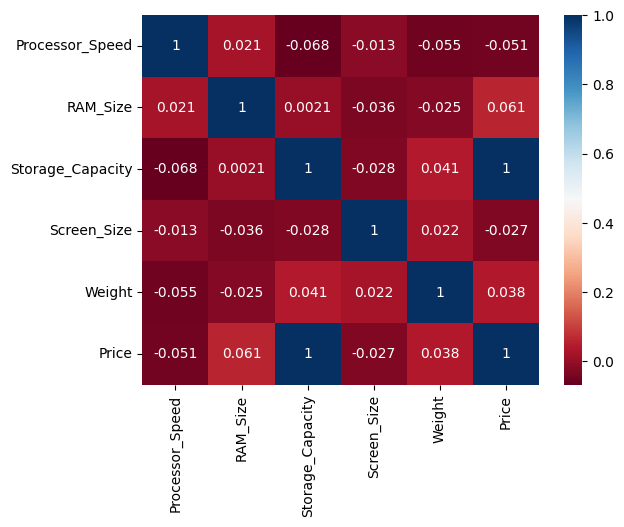

In [68]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

Dapat dilihat, bahwa fitur Storage_Capacity memiliki korelasi yang sangat tinggi dengan price. Maka fitur ini yang akan digunakan dalam visualisasi model nantinya.

In [69]:
le = LabelEncoder()
df["Brand"] = le.fit_transform(df["Brand"])

Melakukan transformasi data pada fitur Brand yang awalnya object menjadi numeric.

In [70]:
data = df.values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

Menormalisasi isi dari data. Hasilnya :

In [71]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718


##Splitting Data

In [72]:
x = data[:, :-1]
y = data[:, -1]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

X adalah fitur yang akan digunakan untuk memprediksi nilai y. Y adalah target yaitu Price. Proses splitting data menggunakan test size = 0.2 yaitu 80% digunakan untuk training dan 20% lagi untuk testing.

##Build model using SVR

In [74]:
# Inisialisasi model SVR dengan kernel RBF dan parameter C=0.9
model_svr = SVR(kernel='linear', C=0.9)

# Latih model SVR
model_svr.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = model_svr.predict(X_test)

# Evaluasi model SVR
mse_svr = mean_squared_error(y_test, y_pred)
r_squared_svr = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print("Support Vector Regression (RBF Kernel):")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r_squared_svr)

Support Vector Regression (RBF Kernel):
Mean Squared Error: 0.00460683737861325
R-squared: 0.9684561479919793


Nilai MSE mendekati 0 menunjukkan model semakin baik. Nilai R-Squared mendekati 1 menunjukkan model mendekati nilai sempurna untuk memprediksi variabilitas data.

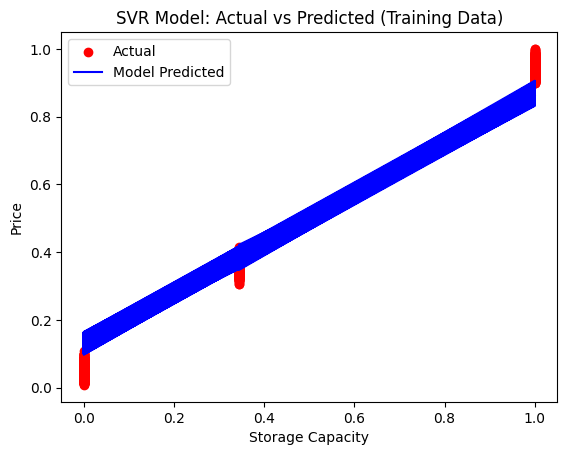

In [75]:
# Memilih kolom 'Storage_Capacity' dari fitur sebagai variabel independen
x = X_train[:, 3].reshape(-1, 1)

# Memvisualisasikan hasil prediksi model
plt.scatter(x, y_train, color='red', label='Actual')
plt.plot(x, model_svr.predict(X_train), color='blue', label='Model Predicted')
plt.title('SVR Model: Actual vs Predicted (Training Data)')
plt.xlabel('Storage Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

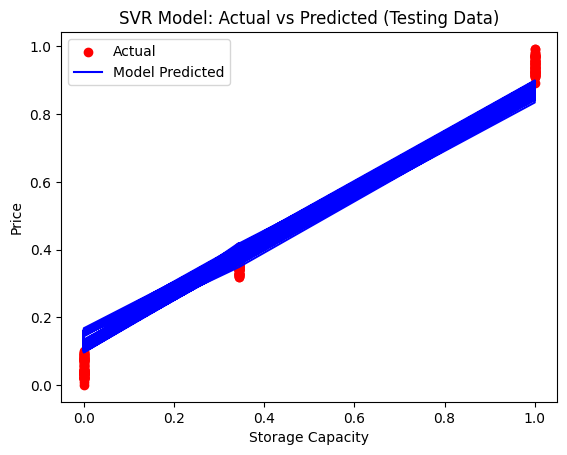

In [76]:
# Memilih kolom 'Storage_Capacity' dari fitur sebagai variabel independen
x = X_test[:, 3].reshape(-1, 1)

# Memvisualisasikan hasil prediksi model
plt.scatter(x, y_test, color='red', label='Actual')
plt.plot(x, y_pred, color='blue', label='Model Predicted')
plt.title('SVR Model: Actual vs Predicted (Testing Data)')
plt.xlabel('Storage Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()


Visualisasi diatas menggambarkan semakin sedikit storage capacity yang dimiliki sebuah laptop maka semakin rendah pula harga laptop. Hal ini berlaku pada tiap brand karena sebarannya dirasa sangat stabil.